# Écoulements de Poiseuille - Couette
*O. Thual, le 30/10/2021. CC BY-SA - Version avec animation pour Binder*

Ce programme interactif se rapporte à l'exercice IIa du chapitre 8 du cours de [Mécanique des milieux continus](http://pedagotech.inp-toulouse.fr/121018). 

On s'intéresse à l'écoulement de Poiseuille - Couette suivant : 
$$ U(z) = \beta \, l^2 \left[1- \left( {z\over l}\right)^2\right]+ U_* \left( {1\over 2} +{z\over 2\,l}\right)\;. $$
où $\beta = {P_0-P_L \over 2 \nu_n \rho_o L}$ est proportionnel au gradient de pression et $U_*$ est le vitesse qui intervient dans les conditions aux limites $U(-l)=0$ et $U(l) = U_*$. 

On adimensionne le champ de vitesse de la façon suivante :
$$\widetilde U\left(z\over l\right) = {U(z) \over U_p + U_c}\,$$
avec $U_p =\beta l^2$ et $U_c = U_*$. On a donc : 
$$ \widetilde U(\zeta) = \Lambda_p \left(1- \zeta^2\right) + \Lambda_c \left({1\over 2} + {\zeta\over 2}\right)\;,$$
avec $\Lambda_p = U_p/(U_p+U_c)$ et $\Lambda_c = U_c/(U_p+U_c)$. On a $\Lambda_p+\Lambda_c=1$. 

On souhaite tracer les profils $\widetilde U(\zeta)$ pour $\Lambda_p \in [0,1]$, ce qui permet de visualiser les profils de vitesse $U(z) = (\beta \, l^2 + U_*) \, \widetilde U(z/l)$. 


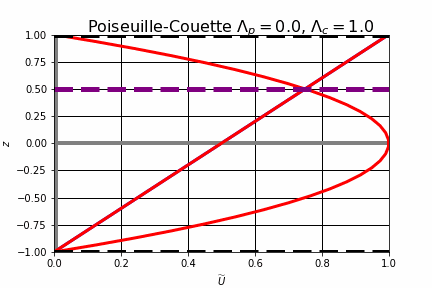

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme !

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def zfi(x,le=3):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

def initialization():
    # Poiseuille et Couette
    Up=(1-ze**2)
    Uc=(.5+.5*ze)
    U=np.concatenate((Up,Uc))
    Z=np.concatenate((ze,ze))
    plt.plot(Up,ze,linewidth=3,color="red")
    plt.plot(Uc,ze,linewidth=3,color="red")
    # cadre 
    plt.plot([0,Umax],[1,1],"--",linewidth=5,color='black')
    plt.plot([0,Umax],[-1,-1],"--",linewidth=5,color='black')
    plt.plot([0,Umax],[.5,.5],"--",linewidth=5,color='purple')    
    line.set_data(U,Z)
    tit.set_text("Poiseuille et Couette")
    plt.show()
    return (line,),tit

def animation(Lap):
    # Poiseuille et Couette
    Up=(1-ze**2)
    Uc=(.5+.5*ze)
    U=np.concatenate((Up,Uc))
    Z=np.concatenate((ze,ze))
    plt.plot(U,Z,linewidth=3,color="red")
    # Profil de vitesse
    Lap=round(Lap,1); Lac=round(1-Lap,1);
    U=Lap*(1-ze**2)+Lac*(.5+.5*ze)
    plt.title(r"Poiseuille-Couette $\Lambda_p=$"+zfi(Lap,0)
       +", $\Lambda_c=$"+zfi(Lac,0))
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.ylabel(r'$z$'); plt.xlabel(r'$\widetilde U$')
    plt.axvline(0,linewidth=7,color='grey')
    plt.axhline(0,linewidth=4,color='grey')
    plt.plot(U,ze,linewidth=3,color="blue")
    plt.plot([0,Umax],[1,1],"--",linewidth=5,color='black')
    plt.plot([0,Umax],[-1,-1],"--",linewidth=5,color='black')
    plt.plot([0,Umax],[.5,.5],"--",linewidth=5,color='purple')
    line.set_color("blue")
    line.set_data(U,ze)
    tit.set_text(r"Poiseuille-Couette $\Lambda_p=$"+zfi(Lap,0)
       +", $\Lambda_c=$"+zfi(Lac,0))
    plt.show()
    return (line,),tit

Vous pouvez modifier de le paramètre suivant : 


*   dL : pas de tracé pour $\Lambda_p$

Exécutez la programme suivant pour visualiser les figures au bas de la page ! 


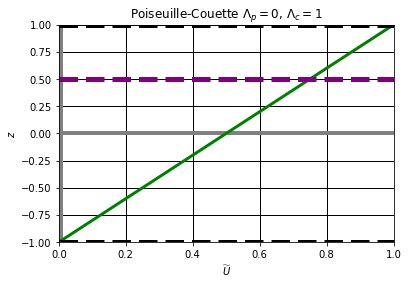

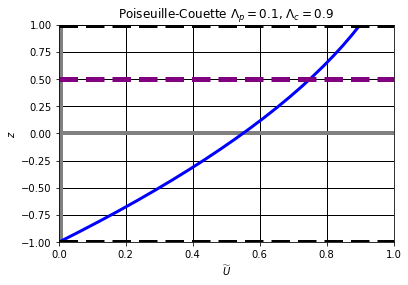

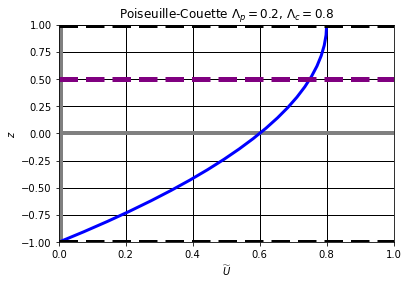

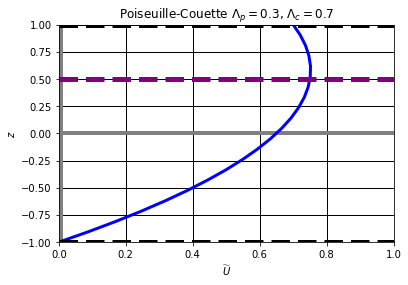

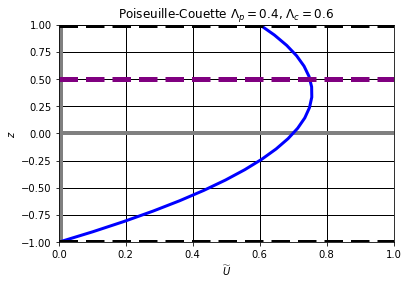

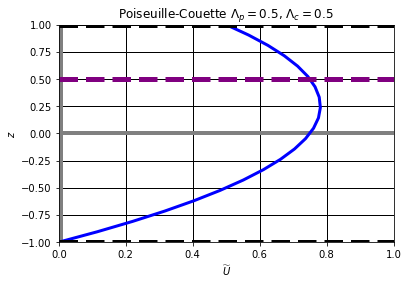

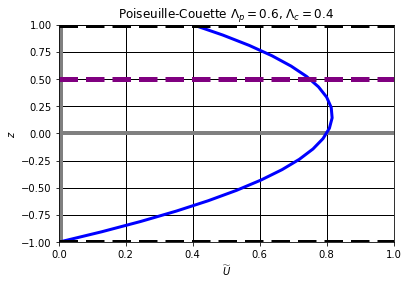

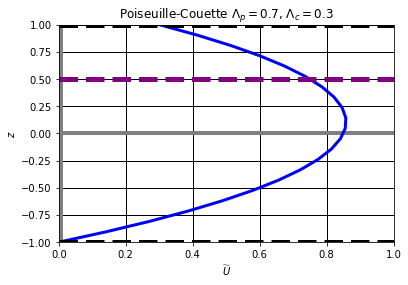

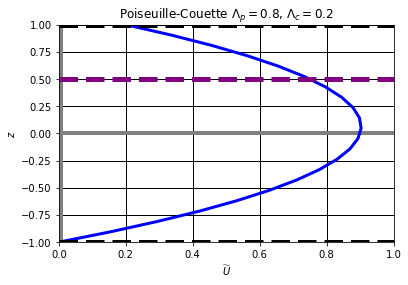

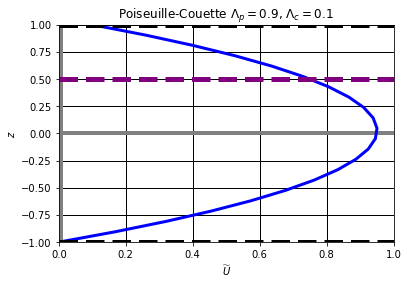

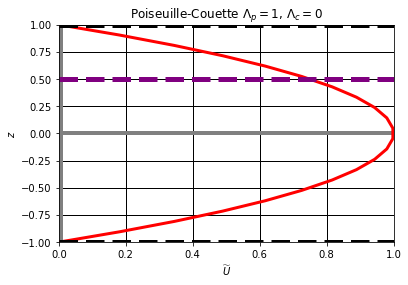

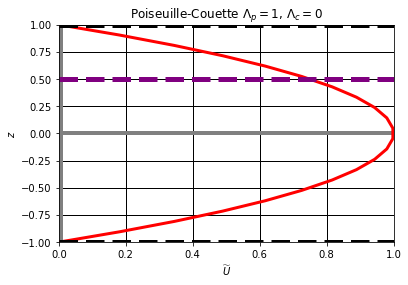

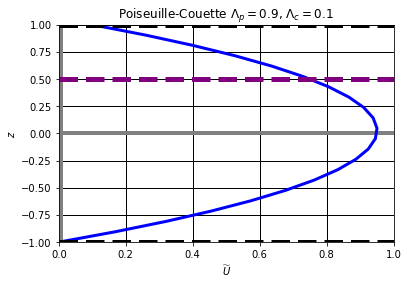

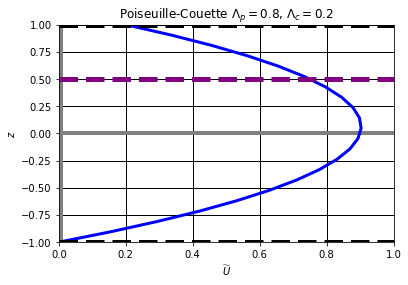

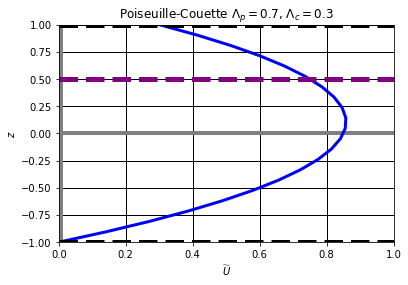

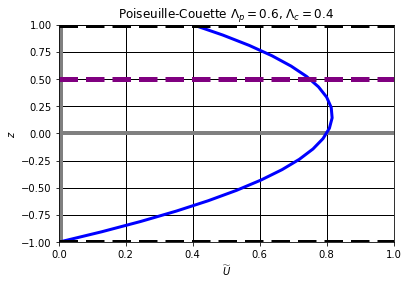

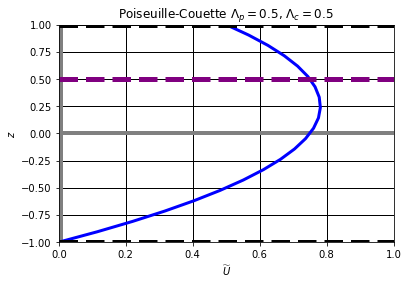

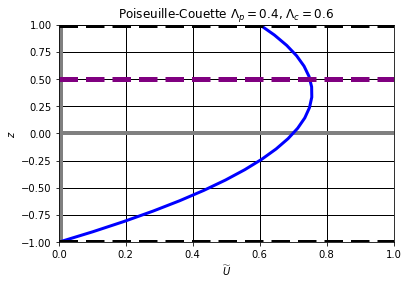

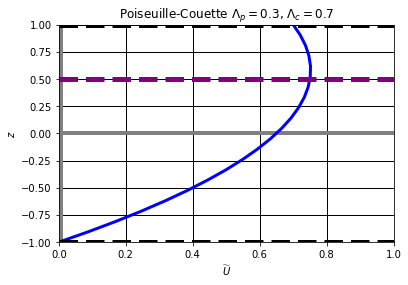

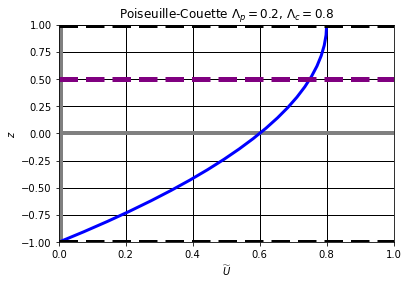

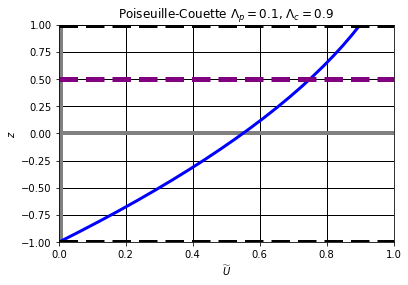

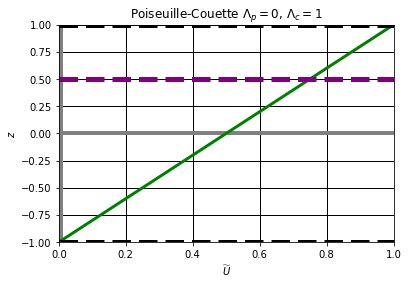

In [ ]:
# parameters
dL=.1; Lap=dL; Lac=1-Lap; 
tab=np.concatenate((np.arange(0,1+dL,dL),np.arange(1,-dL,-dL)))

# Vertical coordinate
Nz=31;  
ze=np.linspace(-1,1,Nz+1); 
 
# For figure and animation
dela=200;
Umax=1; 

# Prepare figure
fig = plt.figure ()
ax = plt.subplot()
line,= ax.plot([], [], linewidth=3,color="blue")
tit=ax.text(.1,1.01,'', transform = ax.transAxes,fontsize=16)
plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
plt.ylabel(r'$z$'); plt.xlabel(r'$\widetilde U$')
plt.axvline(0,linewidth=7,color='grey')
plt.axhline(0,linewidth=4,color='grey')
plt.xlim(0,Umax); plt.ylim(-1,1)
       

# Animation
anima=FuncAnimation(fig,animation,init_func=initialization,
                    frames=tab,interval=dela)
anima.save('poiscou.gif', writer='pillow')

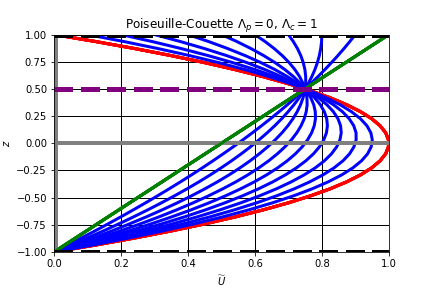